In [ ]:
#users.csv
import requests
import csv

# Replace with your personal access token
GITHUB_TOKEN = 'token'
HEADERS = {'Authorization': f'token {GITHUB_TOKEN}'}
BASE_URL = 'https://api.github.com'

def get_users_in_bangalore():
    users = []
    page = 1

    while True:
        response = requests.get(f'{BASE_URL}/search/users',
                                headers=HEADERS,
                                params={'q': 'location:Bangalore followers:>100', 'page': page})
        data = response.json()

        if 'items' not in data or not data['items']:
            break

        for user in data['items']:
            users.append(user['login'])

        page += 1

    return users

def get_user_details(username):
    response = requests.get(f'{BASE_URL}/users/{username}', headers=HEADERS)
    return response.json()

def clean_company(company):
    if company:
        return company.strip().lstrip('@').upper()
    return None

def main():
    users = get_users_in_bangalore()
    user_details = []

    for user in users:
        details = get_user_details(user)
        user_details.append({
            'login': details.get('login'),
            'name': details.get('name'),
            'company': clean_company(details.get('company')),
            'location': details.get('location'),
            'email': details.get('email'),
            'hireable': details.get('hireable'),
            'bio': details.get('bio'),
            'public_repos': details.get('public_repos'),
            'followers': details.get('followers'),
            'following': details.get('following'),
            'created_at': details.get('created_at'),
        })

    # Write to CSV
    with open('users.csv', 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['login', 'name', 'company', 'location', 'email',
                      'hireable', 'bio', 'public_repos', 'followers',
                      'following', 'created_at']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for user in user_details:
            writer.writerow(user)

if __name__ == '__main__':
    main()


In [ ]:
#more cleaned users.csv
import pandas as pd

# Load the data
users_df = pd.read_csv('users.csv')

# Clean the company names
users_df['company'] = users_df['company'].str.strip()  # Trim whitespace
users_df['company'] = users_df['company'].str.lstrip('@')  # Strip leading '@'
users_df['company'] = users_df['company'].str.upper()  # Convert to uppercase

# Save the cleaned DataFrame back to users.csv
users_df.to_csv('users.csv', index=False)

print("Company names cleaned and saved to users.csv.")


Company names cleaned and saved to users.csv.


In [ ]:
#repositories.csv
import requests
import csv

# Replace with your personal access token
GITHUB_TOKEN = 'token'
HEADERS = {'Authorization': f'token {GITHUB_TOKEN}'}
BASE_URL = 'https://api.github.com'

def read_users_from_csv(file_path):
    users = []
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            users.append(row['login'])
    return users

def get_repositories(username):
    repos = []
    page = 1
    while True:
        response = requests.get(f'{BASE_URL}/users/{username}/repos',
                                headers=HEADERS,
                                params={'sort': 'pushed', 'direction': 'desc', 'per_page': 100, 'page': page})
        data = response.json()

        if not data or len(repos) >= 500:
            break

        for repo in data:
            repos.append({
                'full_name': repo['full_name'],
                'created_at': repo['created_at'],
                'stargazers_count': repo['stargazers_count'],
                'watchers_count': repo['watchers_count'],
                'language': repo['language'],
                'has_projects': repo['has_projects'],
                'has_wiki': repo['has_wiki'],
                'license_name': repo['license']['key'] if repo.get('license') else None  # Safely fetch license key
            })

        page += 1

    return repos[:500]  # Return up to 500 repos

def main():
    users = read_users_from_csv('users.csv')
    all_repos = []

    for user in users:
        repos = get_repositories(user)
        for repo in repos:
            all_repos.append({
                'login': user,
                **repo
            })

    # Write to CSV
    with open('repositories.csv', 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['login', 'full_name', 'created_at',
                      'stargazers_count', 'watchers_count',
                      'language', 'has_projects',
                      'has_wiki', 'license_name']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for repo in all_repos:
            writer.writerow(repo)

if __name__ == '__main__':
    main()


In [ ]:
#Q1
import pandas as pd

# Load the data
users_df = pd.read_csv('users.csv')

# Sort by followers and get top 5
top_users = users_df.sort_values(by='followers', ascending=False).head(5)

# Extract logins
top_logins = top_users['login'].tolist()
result = ', '.join(top_logins)

print(result)


krishnaik06, championswimmer, arpitbbhayani, manjunath5496, tanaypratap


In [ ]:
#Q2
import pandas as pd

# Load the data
users_df = pd.read_csv('users.csv')

# Convert created_at to datetime
users_df['created_at'] = pd.to_datetime(users_df['created_at'])

# Sort by created_at and get the earliest 5 users
earliest_users = users_df.sort_values(by='created_at').head(5)

# Extract logins
earliest_logins = earliest_users['login'].tolist()
result = ', '.join(earliest_logins)

print(result)


anandology, irfn, jace, abhisek, abhin4v


In [ ]:
#Q3
import pandas as pd

# Load the data
repositories_df = pd.read_csv('repositories.csv')

# Filter out missing license names
repositories_df = repositories_df[repositories_df['license_name'].notna()]

# Count occurrences of each license
license_counts = repositories_df['license_name'].value_counts()

# Get the top 3 licenses
top_licenses = license_counts.head(3).index.tolist()

# Join the license names in order
result = ', '.join(top_licenses)

print(result)


mit, apache-2.0, other


In [ ]:
#Q4
import pandas as pd

# Load the data
users_df = pd.read_csv('users.csv')

# Count occurrences of each company
company_counts = users_df['company'].value_counts()

# Get the company with the highest count
most_common_company = company_counts.idxmax()
most_common_count = company_counts.max()

print(f"The majority of developers work at: {most_common_company} with {most_common_count} developers.")


The majority of developers work at: GOOGLE with 15 developers.


In [ ]:
#Q5
import pandas as pd

# Load the data
repositories_df = pd.read_csv('repositories.csv')

# Count occurrences of each programming language, ignoring missing values
language_counts = repositories_df['language'].value_counts()

# Get the most popular programming language
most_popular_language = language_counts.idxmax()
most_popular_count = language_counts.max()

print(f"The most popular programming language is: {most_popular_language} with {most_popular_count} repositories.")


The most popular programming language is: JavaScript with 8618 repositories.


In [ ]:
#Q6
import pandas as pd

# Load the data
users_df = pd.read_csv('users.csv')
repositories_df = pd.read_csv('repositories.csv')

# Convert created_at to datetime and filter users who joined after 2020
users_df['created_at'] = pd.to_datetime(users_df['created_at'])
recent_users = users_df[users_df['created_at'] > '2020-01-01']

# Get the logins of recent users
recent_user_logins = recent_users['login'].tolist()

# Filter repositories by these users
recent_repositories = repositories_df[repositories_df['login'].isin(recent_user_logins)]

# Count occurrences of each programming language
language_counts = recent_repositories['language'].value_counts()

# Get the second most popular programming language
second_most_popular_language = language_counts.nlargest(2).index[1]
second_most_popular_count = language_counts.nlargest(2).values[1]

print(f"The second most popular programming language among users who joined after 2020 is: {second_most_popular_language} with {second_most_popular_count} repositories.")


The second most popular programming language among users who joined after 2020 is: HTML with 652 repositories.


In [ ]:
#Q7
import pandas as pd

# Load the data
repositories_df = pd.read_csv('repositories.csv')

# Group by programming language and calculate the average stars
average_stars = repositories_df.groupby('language')['stargazers_count'].mean()

# Identify the language with the highest average stars
highest_average_language = average_stars.idxmax()
highest_average_value = average_stars.max()

print(f"The programming language with the highest average number of stars per repository is: {highest_average_language} with an average of {highest_average_value:.2f} stars.")


The programming language with the highest average number of stars per repository is: Pascal with an average of 92.00 stars.


In [ ]:
#Q8
import pandas as pd

# Load the data
users_df = pd.read_csv('users.csv')

# Calculate leader_strength
users_df['leader_strength'] = users_df['followers'] / (1 + users_df['following'])

# Sort by leader_strength and get the top 5
top_leaders = users_df.sort_values(by='leader_strength', ascending=False).head(5)

# Extract logins
top_logins = top_leaders['login'].tolist()
result = ', '.join(top_logins)

print(result)


krishnaik06, Hack-with-Github, laxmimerit, tanaypratap, abhishh1


In [ ]:
#Q9
import pandas as pd

# Load the data
users_df = pd.read_csv('users.csv')

# Calculate the correlation between followers and public repositories
correlation = users_df['followers'].corr(users_df['public_repos'])

print(f"The correlation between the number of followers and the number of public repositories is: {correlation:.3f}")


The correlation between the number of followers and the number of public repositories is: 0.191


In [ ]:
#Q10
import pandas as pd
import statsmodels.api as sm

# Load the data
users_df = pd.read_csv('users.csv')

# Define the independent variable (X) and dependent variable (Y)
X = users_df['public_repos']
Y = users_df['followers']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the summary of the regression results
summary = model.summary()

# Extract the coefficient for public_repos
additional_followers_per_repo = model.params['public_repos']

print(f"Regression Results:\n{summary}")
print(f"Estimated additional followers per additional public repository: {additional_followers_per_repo:.3f}")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     22.42
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           2.75e-06
Time:                        09:12:33   Log-Likelihood:                -5084.0
No. Observations:                 591   AIC:                         1.017e+04
Df Residuals:                     589   BIC:                         1.018e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          165.6677     

In [ ]:
#Q11
import pandas as pd

# Load the data
repositories_df = pd.read_csv('repositories.csv')


# Calculate the correlation directly
correlation = repositories_df['has_projects'].astype(int).corr(repositories_df['has_wiki'].astype(int))

print(f"The correlation between having projects enabled and having a wiki enabled is: {correlation:.3f}")


The correlation between having projects enabled and having a wiki enabled is: 0.197


In [ ]:
#Q12
import pandas as pd

# Load the users data from the CSV file
users_df = pd.read_csv('users.csv')

# Filter hireable and non-hireable users
hireable_users = users_df[users_df['hireable'] == True]
non_hireable_users = users_df[users_df['hireable'].isna() | (users_df['hireable'] == False)]

# Calculate average following for both groups
average_hireable_following = hireable_users['following'].mean()
average_non_hireable_following = non_hireable_users['following'].mean()

# Calculate the difference
difference = average_hireable_following - average_non_hireable_following

# Print the result rounded to three decimal places
print(f'Difference in average following (hireable - non-hireable): {difference:.3f}')


Difference in average following (hireable - non-hireable): 64.499


In [ ]:
#Q13
import pandas as pd
import statsmodels.api as sm

# Load the users data from the CSV file
users_df = pd.read_csv('users.csv')

# Filter out users without bios
users_with_bios = users_df[users_df['bio'].notna()]

# Calculate the length of the bio in words
#users_with_bios['bio_word_count'] = users_with_bios['bio'].str.split(" ").str.len()

users_with_bios['bio_word_count'] = users_with_bio['bio'].apply(lambda x: len(x.split()))


# Prepare the data for regression
X = users_with_bios['bio_word_count']  # Independent variable
y = users_with_bios['followers']        # Dependent variable

# Add a constant to the independent variable for the regression
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression slope (coefficient for bio_word_count)
slope = model.params['bio_word_count']

# Print the slope rounded to three decimal places
print(f'Regression slope of followers on bio word count: {slope:.3f}')


Regression slope of followers on bio word count: 0.269


<ipython-input-68-187113772ce8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_with_bios['bio_word_count'] = users_with_bio['bio'].apply(lambda x: len(x.split()))


In [ ]:
#Q14
import pandas as pd

# Load the repositories data from the CSV file
repos_df = pd.read_csv('repositories.csv')

# Convert the created_at column to datetime
repos_df['created_at'] = pd.to_datetime(repos_df['created_at'])

# Filter for weekend days (Saturday: 5, Sunday: 6)
weekend_repos = repos_df[repos_df['created_at'].dt.dayofweek.isin([5, 6])]

# Count the number of repositories created by each user
top_users = weekend_repos['login'].value_counts().head(5)

# Get the top 5 users' logins in order
top_users_logins = ', '.join(top_users.index)

# Print the result
print(f'Top 5 users who created the most repositories on weekends: {top_users_logins}')


Top 5 users who created the most repositories on weekends: itaditya, avinassh, sangam14, manjunath5496, championswimmer


In [ ]:
#Q15
import pandas as pd

# Load the users data from the CSV file
users_df = pd.read_csv('users.csv')

# Total number of users
total_users = len(users_df)

# Filter hireable and non-hireable users
hireable_users = users_df[users_df['hireable'] == True]
non_hireable_users = users_df[users_df['hireable'].isna() | (users_df['hireable'] == False)]

# Calculate the fraction of users with email in both groups
fraction_hireable_with_email = hireable_users['email'].notna().mean()
fraction_non_hireable_with_email = non_hireable_users['email'].notna().mean()

# Calculate the difference
difference = fraction_hireable_with_email - fraction_non_hireable_with_email

# Print the result rounded to three decimal places
print(f'Difference in fraction of users with email: {difference:.3f}')


Difference in fraction of users with email: 0.192


In [ ]:
#Q16
import pandas as pd

# Load the users data from the CSV file
users_df = pd.read_csv('users.csv')

# Filter out users without names
valid_users = users_df[users_df['name'].notna()]

# Extract surnames (last word in name)
valid_users['surname'] = valid_users['name'].str.strip().str.split().str[-1]

# Count occurrences of each surname
surname_counts = valid_users['surname'].value_counts()

# Find the most common surname(s)
max_count = surname_counts.max()
most_common_surnames = surname_counts[surname_counts == max_count].index.tolist()

# Sort surnames alphabetically
most_common_surnames.sort()

# Count users with the most common surname
number_of_users = max_count

# Print results
most_common_surnames_str = ', '.join(most_common_surnames)
print(f'Most common surname(s): {most_common_surnames_str}')
print(f'Number of users with the most common surname: {number_of_users}')


Most common surname(s): Kumar, Singh
Number of users with the most common surname: 21


<ipython-input-35-b00a37d357b7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_users['surname'] = valid_users['name'].str.strip().str.split().str[-1]


Wrong Answers In Q11, 12, 15 > because In Original Files, Booleans are True/False . We have to upload Booleans as true/false in github repo. Run Scripts below and then upload resulting files to github.

In [ ]:

repositories_df = pd.read_csv('repositories.csv')

# Check the data types and structure
print(repositories_df.head())

# Replace True/False with true/false
repositories_df['has_projects'] = repositories_df['has_projects'].replace({True: 'true', False: 'false'})
repositories_df['has_wiki'] = repositories_df['has_wiki'].replace({True: 'true', False: 'false'})

# Save the modified DataFrame back to the same CSV file
repositories_df.to_csv('repositories.csv', index=False)

# Check the data types and structure
print(repositories_df.head())

print("Updated CSV file saved successfully.")


         login                           full_name            created_at  \
0  krishnaik06  krishnaik06/Polars-GPU-Engine-Demo  2024-10-28T08:42:45Z   
1  krishnaik06  krishnaik06/Transformers-Materials  2024-10-19T15:43:30Z   
2  krishnaik06              krishnaik06/ETLWeather  2024-10-15T10:45:09Z   
3  krishnaik06                krishnaik06/datasets  2024-10-08T05:16:12Z   
4  krishnaik06             krishnaik06/testdagshub  2024-10-01T16:57:42Z   

   stargazers_count  watchers_count          language  has_projects  has_wiki  \
0                 1               1  Jupyter Notebook          True      True   
1                10              10               NaN          True      True   
2                 9               9            Python          True      True   
3                 3               3               NaN          True      True   
4                 0               0               NaN          True      True   

  license_name  
0      gpl-3.0  
1      gpl-3.0  
2    

In [ ]:
users_df = pd.read_csv('users.csv')

# Check the data types and structure
print(users_df.head())

# Replace True/False with true/false in the hireable column
users_df['hireable'] = users_df['hireable'].replace({True: 'true', False: 'false'})

# Save the modified DataFrame back to the same CSV file
users_df.to_csv('users.csv', index=False)

# Check the data types and structure
print(users_df.head())


print("Updated CSV file saved successfully.")



             login           name          company          location  \
0      krishnaik06   Krish C Naik    PANASONIC IIC         Bangalore   
1  championswimmer    Arnav Gupta        JIOCINEMA  Bangalore, India   
2    arpitbbhayani  Arpit Bhayani           DICEDB         Bangalore   
3    manjunath5496    Manjunath.R  MYW3SCHOOLS.COM  Bangalore, India   
4      tanaypratap   Tanay Pratap           INVACT  Bangalore, India   

                     email hireable  \
0    krishnaik06@gmail.com      NaN   
1   dev@championswimmer.in     True   
2                      NaN     True   
3  manjunath5496@gmail.com      NaN   
4      tanay.mit@gmail.com      NaN   

                                                 bio  public_repos  followers  \
0  Data Scientist with ML and Deep  Learning expe...           330      30906   
1  Director of Engineering - @JioCinema ┃\r\nPast...           351       4661   
2  Creator of @DiceDB • ex-Google Dataproc, ex-Am...           188       4557   
3  "Scie

Analysis

In [ ]:
import pandas as pd

# Load the repositories data from the CSV file
repositories_df = pd.read_csv('repositories.csv')

# Check for missing values in 'language' and 'stargazers_count'
print("Missing values in 'language':", repositories_df['language'].isnull().sum())
print("Missing values in 'stargazers_count':", repositories_df['stargazers_count'].isnull().sum())

# Drop rows with missing values in 'language' or 'stargazers_count'
repositories_df.dropna(subset=['language', 'stargazers_count'], inplace=True)

# Group by language to calculate total and average stargazers count
language_stars = repositories_df.groupby('language')['stargazers_count'].agg(['sum', 'mean']).reset_index()

# Find the language with the most total stargazers count
most_stargazed_language = language_stars.loc[language_stars['sum'].idxmax()]

# Find the language with the highest average stargazers count
highest_avg_stargazers_language = language_stars.loc[language_stars['mean'].idxmax()]

# Print results
print(f"Language with the most stargazers: {most_stargazed_language['language']} with {most_stargazed_language['sum']} stargazers")
print(f"Language with the highest average stargazers count: {highest_avg_stargazers_language['language']} with an average of {highest_avg_stargazers_language['mean']:.2f} stargazers")


Missing values in 'language': 14610
Missing values in 'stargazers_count': 0
Language with the most stargazers: JavaScript with 112765 stargazers
Language with the highest average stargazers count: Pascal with an average of 92.00 stargazers


In [ ]:
import pandas as pd

# Load the users data from the CSV file
users_df = pd.read_csv('users.csv')

# Check for missing values in 'company' and 'public_repos'
print("Missing values in 'company':", users_df['company'].isnull().sum())
print("Missing values in 'public_repos':", users_df['public_repos'].isnull().sum())

# Drop rows with missing values in 'company' or 'public_repos'
users_df.dropna(subset=['company', 'public_repos'], inplace=True)

# Clean up the company names by stripping whitespace and converting to uppercase
users_df['company'] = users_df['company'].str.strip().str.upper()

# Group by company to calculate total number of public repos
company_repos = users_df.groupby('company')['public_repos'].sum().reset_index()

# Sort the companies by total public repos in descending order
top_companies = company_repos.sort_values(by='public_repos', ascending=False).head(5)

# Print the top 5 companies with most public repositories
print("Top 5 companies with the most public repositories:")
print(top_companies)


Missing values in 'company': 172
Missing values in 'public_repos': 0
Top 5 companies with the most public repositories:
               company  public_repos
220    MYW3SCHOOLS.COM          1563
119             GOOGLE           972
65   CRAFTSMAN SYSTEMS           912
208          MICROSOFT           678
13            AMEG-YAG           594


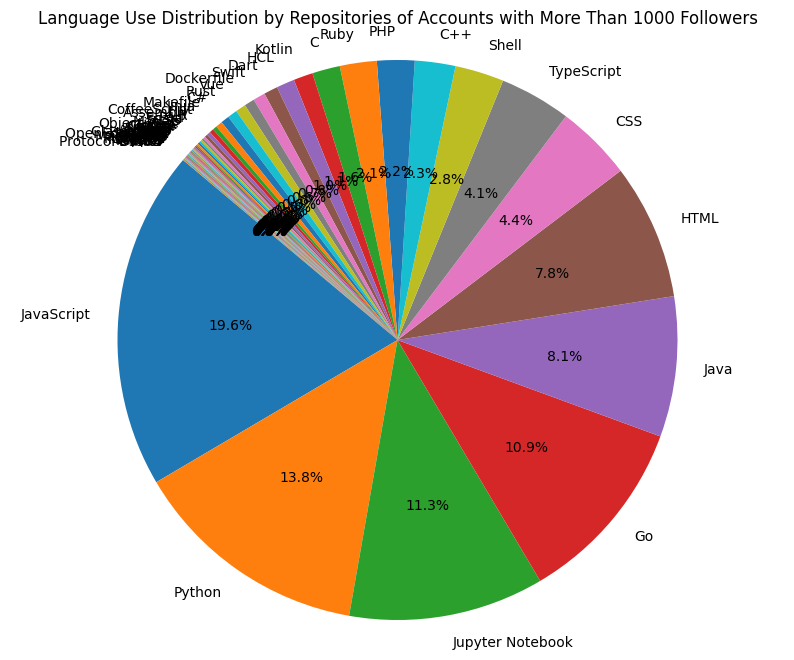

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the users data from the CSV file
users_df = pd.read_csv('users.csv')

# Load the repositories data from the CSV file
repositories_df = pd.read_csv('repositories.csv')

# Filter users with more than 1000 followers
popular_users = users_df[users_df['followers'] > 1000]

# Merge users with their repositories
popular_repos = repositories_df[repositories_df['login'].isin(popular_users['login'])]

# Count repositories by language
language_distribution = popular_repos['language'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(language_distribution, labels=language_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Language Use Distribution by Repositories of Accounts with More Than 1000 Followers')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


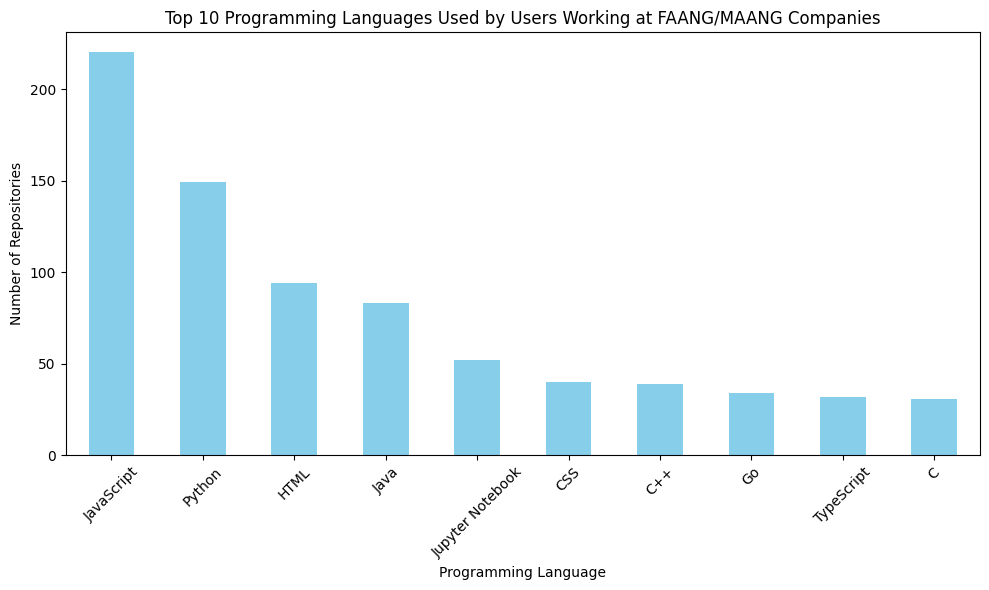

Top 10 Programming Languages:
language
JavaScript          220
Python              149
HTML                 94
Java                 83
Jupyter Notebook     52
CSS                  40
C++                  39
Go                   34
TypeScript           32
C                    31
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the users data from the CSV file
users_df = pd.read_csv('users.csv')

# Load the repositories data from the CSV file
repositories_df = pd.read_csv('repositories.csv')

# Define FAANG/MAANG companies
faang_maang_companies = ['FACEBOOK', 'META', 'APPLE', 'AMAZON', 'NETFLIX', 'GOOGLE']

# Filter users who work at FAANG/MAANG companies
faang_maang_users = users_df[users_df['company'].str.upper().isin(faang_maang_companies)]

# Merge users with their repositories
faang_maang_repos = repositories_df[repositories_df['login'].isin(faang_maang_users['login'])]

# Count repositories by language
language_distribution = faang_maang_repos['language'].value_counts()

# Get the top 10 languages
top_10_languages = language_distribution.head(10)

# Plotting the bar chart for top 10 languages
plt.figure(figsize=(10, 6))
top_10_languages.plot(kind='bar', color='skyblue')
plt.title('Top 10 Programming Languages Used by Users Working at FAANG/MAANG Companies')
plt.xlabel('Programming Language')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top 10 languages and their counts
print("Top 10 Programming Languages:")
print(top_10_languages)


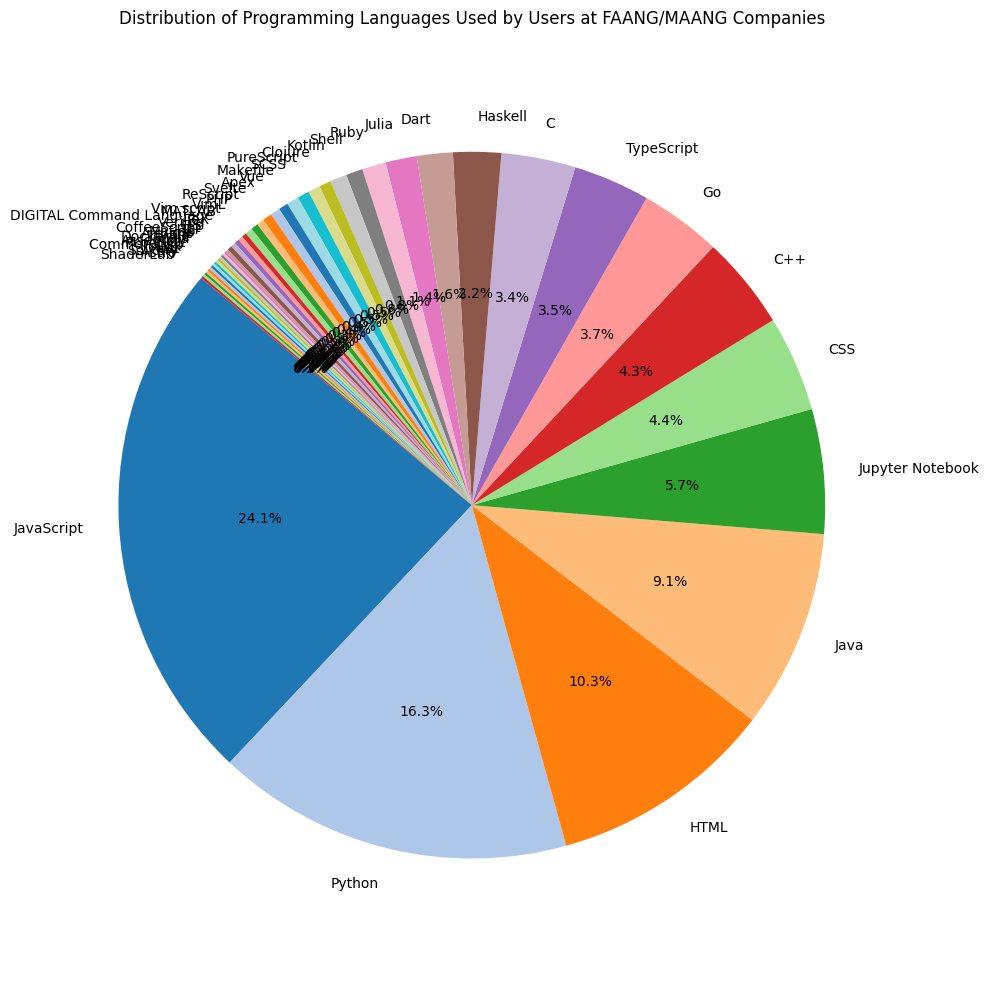

Programming Languages Distribution:
language
JavaScript                  220
Python                      149
HTML                         94
Java                         83
Jupyter Notebook             52
CSS                          40
C++                          39
Go                           34
TypeScript                   32
C                            31
Haskell                      20
Dart                         15
Julia                        13
Ruby                         10
Shell                         7
Kotlin                        7
Clojure                       5
PureScript                    5
SCSS                          5
Makefile                      5
Vue                           4
Apex                          4
Svelte                        4
ReScript                      3
PHP                           3
VimL                          3
Vim script                    2
MATLAB                        2
DIGITAL Command Language      2
TeX                        

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the users data from the CSV file
users_df = pd.read_csv('users.csv')

# Load the repositories data from the CSV file
repositories_df = pd.read_csv('repositories.csv')

# Define FAANG/MAANG companies
faang_maang_companies = ['FACEBOOK', 'META', 'APPLE', 'AMAZON', 'NETFLIX', 'GOOGLE']

# Filter users who work at FAANG/MAANG companies
faang_maang_users = users_df[users_df['company'].str.upper().isin(faang_maang_companies)]

# Merge users with their repositories
faang_maang_repos = repositories_df[repositories_df['login'].isin(faang_maang_users['login'])]

# Count repositories by language
language_distribution = faang_maang_repos['language'].value_counts()

# Plotting the pie chart with all languages
plt.figure(figsize=(10, 10))
plt.pie(language_distribution, labels=language_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Programming Languages Used by Users at FAANG/MAANG Companies')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Print the complete language distribution
print("Programming Languages Distribution:")
print(language_distribution)
